In [1]:
# Data preprocessing

import numpy as np
import pandas as pd 

In [2]:
# Data visualization

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# To retrieve files/pathnames matching a specified pattern

import glob

# Data Processing


In [5]:
# Checking for sub-folder names

import os

DATASET_DIR = "/Users/royku/Sem II Modules/Sem II/WQD7006/Project/COVID-19 Radiography Database"

os.listdir(DATASET_DIR)

['COVID-19',
 'COVID-19.metadata.xlsx',
 'NORMAL',
 'NORMAL.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia',
 'Viral Pneumonia.matadata.xlsx']

We can see that we have 3 folders containing specific radiographic images for reference.
There are 3 metadata files corresponding to 3 folders
There is also a 'readme' file for reference.

##### Reading & Storing Normal Radiographic Images

In [6]:
from tensorflow.keras.preprocessing import image  #loading library for image processing 

In [7]:
normal_images = []
#count = 0

for img_path in glob.glob(DATASET_DIR + "/NORMAL/*"):
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))

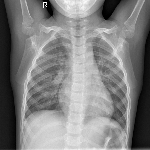

In [8]:
# Checking list contents

normal_images[0]

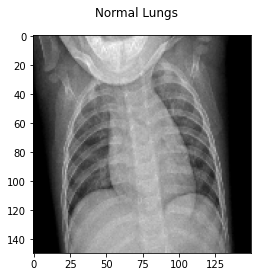

In [9]:
# To plot Normal_lung Radiography Image in scale

fig = plt.figure()
fig.suptitle("Normal Lungs")
plt.imshow(normal_images[1], cmap="gray")
plt.show()

##### Reading and Storing Covid Patient Lung Radiograhy

In [10]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + "/COVID-19/*"): 
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))

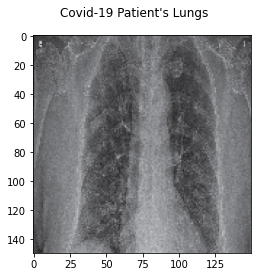

In [11]:
fig = plt.figure()
fig.suptitle("Covid-19 Patient's Lungs ")
plt.imshow(covid_images[0], cmap = "gray")
plt.show()

#####  Reading and Storing Viral Pneumonia Patient Radiography Images

In [12]:
Pneumonia_images = []
for img_path in glob.glob(DATASET_DIR + "/Viral Pneumonia/*"): 
    Pneumonia_images.append(image.load_img(str(img_path), target_size = (150,150,3)))

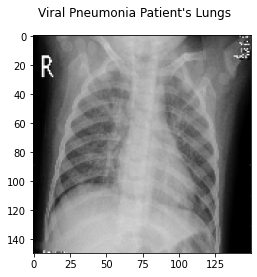

In [13]:
# Plotting Pneumonia Patient's Lung Radiography

fig = plt.figure()
fig.suptitle("Viral Pneumonia Patient's Lungs ")
plt.imshow(Pneumonia_images[0], cmap = "gray")
plt.show()

In [14]:
# Checking size of each category list created

print(str(len(normal_images))+" normal patient images")
print(str(len(covid_images))+" covid patient images")
print(str(len(Pneumonia_images))+" Pneumonia patient images")


1341 normal patient images
219 covid patient images
1345 Pneumonia patient images


As the availability of Radiographic Iamges of Covid-19 patient is not so common, we have a short pool of iamges for that particular category. We have good number of Pneumonia patient images and Normal Images for comparision 

We have to combine our image datasets to create a common pool of image which will be later used to train and test our classfication models. To do so, we will need to convert each radiographic image to its array

In [15]:
# Importing Lib for Image Data Generator

from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

In [16]:
# Combining Normal & Covid19 radiographic images

images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    

In [17]:
#Here normal is labelled as 1 & covid-19 is labelled as 0

targets = np.zeros(len(images_together))
targets[:len(normal_images)-1] = 1

In [18]:
# Combining Pneumonia & Covid19 radiographic images

images_together2 = []

for i in Pneumonia_images:
    images_together2.append(img_to_array(i))
    
for i in covid_images:
    images_together2.append(img_to_array(i))
    

In [19]:
# Here Pneumonia is labelled as 1 & covid-19 is labelled as 0

targets1 = np.zeros(len(images_together2))
targets1[:len(Pneumonia_images)-1] = 1

In [20]:
# Converting Float to array

targets = np.array(targets)
print("targets: ",targets.shape)

targets1 = np.array(targets1)
print("targets1: ",targets1.shape)

targets:  (1560,)
targets1:  (1564,)


In [21]:
# Reshapping Target Variable

targets = targets.reshape(-1,1)
print("new shape of targets: ",targets.shape)

targets1 = targets1.reshape(-1,1)
print("new shape of targets1: ",targets1.shape)

new shape of targets:  (1560, 1)
new shape of targets1:  (1564, 1)


In [22]:
# Converting list to array

images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)


images_together2 = np.array(images_together2)
print("shape of images together: ",images_together2.shape)

shape of images together:  (1560, 150, 150, 3)
shape of images together:  (1564, 150, 150, 3)


# Objective 1: Classify Normal & Covid 19 Patient 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.30, stratify=targets)


In [24]:
# Importing Deep learning Libraries

import tensorflow as tf 
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

In [25]:
# CNN Model Building Variable Declaration

IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)


In [26]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = INPUT_SHAPE, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25)) #Random Dropping out of neurons to restrict from Overfitting


In [27]:
# Flatten model

model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))


In [28]:
# Model Compile

model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [29]:
# Run Model on Training Data

model.fit(X_train, y_train, epochs=20)


Epoch 1/20
35/35 [==============================] - 19s 544ms/step - loss: 38.8712 - accuracy: 0.8278
Epoch 2/20
35/35 [==============================] - 17s 498ms/step - loss: 1.4995 - accuracy: 0.8626
Epoch 3/20
35/35 [==============================] - 17s 500ms/step - loss: 0.1527 - accuracy: 0.9423
Epoch 4/20
35/35 [==============================] - 18s 501ms/step - loss: 1.4985 - accuracy: 0.9341
Epoch 5/20
35/35 [==============================] - 19s 556ms/step - loss: 0.1192 - accuracy: 0.9698
Epoch 6/20
35/35 [==============================] - 20s 563ms/step - loss: 0.7922 - accuracy: 0.9212
Epoch 7/20
35/35 [==============================] - 20s 586ms/step - loss: 1.0408 - accuracy: 0.9359
Epoch 8/20
35/35 [==============================] - 20s 569ms/step - loss: 2.2323 - accuracy: 0.9139
Epoch 9/20
35/35 [==============================] - 19s 554ms/step - loss: 0.1928 - accuracy: 0.9707
Epoch 10/20
35/35 [==============================] - 17s 483ms/step - loss: 0.4954 - accur

In [30]:
model.evaluate(X_val,y_val)

15/15 [==============================] - 2s 130ms/step - loss: 0.7839 - accuracy: 0.9658


[0.7838571667671204, 0.9658119678497314]

# Objective 2: Classify Pneumonia Viral & Covid 19 Patient 

In [31]:
from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train1, y_val1 = train_test_split(images_together2, targets1, test_size=0.30, stratify=targets1)


In [32]:
# We will use the same CNN model created on different set of data

model.fit(X_train1, y_train1, epochs=20)

Epoch 1/20
35/35 [==============================] - 17s 491ms/step - loss: 5.4089 - accuracy: 0.9031
Epoch 2/20
35/35 [==============================] - 18s 525ms/step - loss: 0.1607 - accuracy: 0.9516
Epoch 3/20
35/35 [==============================] - 16s 469ms/step - loss: 0.3157 - accuracy: 0.9570
Epoch 4/20
35/35 [==============================] - 19s 532ms/step - loss: 0.2500 - accuracy: 0.9589
Epoch 5/20
35/35 [==============================] - 16s 461ms/step - loss: 0.0835 - accuracy: 0.9790
Epoch 6/20
35/35 [==============================] - 16s 465ms/step - loss: 1.7268 - accuracy: 0.9260
Epoch 7/20
35/35 [==============================] - 17s 477ms/step - loss: 0.0848 - accuracy: 0.9808
Epoch 8/20
35/35 [==============================] - 19s 534ms/step - loss: 0.5009 - accuracy: 0.9634
Epoch 9/20
35/35 [==============================] - 16s 466ms/step - loss: 0.1479 - accuracy: 0.9735
Epoch 10/20
35/35 [==============================] - 17s 472ms/step - loss: 0.0803 - accura

In [33]:
model.evaluate(X_val,y_val)

15/15 [==============================] - 2s 112ms/step - loss: 0.8135 - accuracy: 0.9594


[0.8134745359420776, 0.9594017267227173]